Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import matplotlib.image as image
import warnings
warnings.filterwarnings('ignore')

In [2]:
# If you are using the data by mounting the google drive, use the following :
#from google.colab import drive
#drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

In [3]:
#p = pathlib.Path('gdrive/MyDrive/CNN_Data/Train')
#for x in p.iterdir():
#  print(x)
#print(list(p.glob('*/*.jpg'))[0])

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [4]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
# data_dir_train = pathlib.Path("gdrive/MyDrive/CNN_Data/Train")
# data_dir_test = pathlib.Path("gdrive/MyDrive/CNN_Data/Test")

data_dir_train = pathlib.Path(r"C:\Users\Rebel\Documents\upgrad\CNN_assignment\CNN_Data\Train")
data_dir_test = pathlib.Path(r"C:\Users\Rebel\Documents\upgrad\CNN_assignment\CNN_Data\Test")


In [5]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [6]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [7]:
# train_ds =  tf.keras.preprocessing.image_dataset_from_directory(
#     data_dir_train, labels='inferred', label_mode='categorical', 
#     color_mode='rgb', batch_size=batch_size, image_size=(img_height, img_width),  seed=123
# )

train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2, # here we splitting the data. 0.2 means 20% of validation set
  subset="training", #the subset return of this function
  seed=123,
  image_size=(img_height, img_width), #resizing will be done here while reading the image
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


In [8]:
train_ds

<BatchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [9]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
# for i in list(data_dir_test.glob('*/*.jpg')):
#   im=PIL.Image.open(i)
#   im.resize((img_height,img_width))



In [10]:
# val_ds = tf.keras.preprocessing.image_dataset_from_directory(
#     data_dir_test, labels='inferred', label_mode='categorical', 
#     color_mode='rgb', batch_size=batch_size, image_size=(img_height, img_width),  seed=123
# )
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)
val_ds

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


<BatchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [11]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


In [12]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


### Visualize the data
#### create a code to visualize one instance of all the nine classes present in the dataset

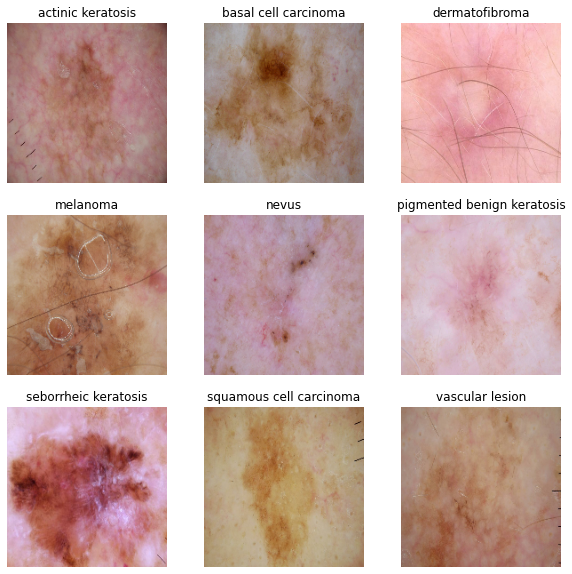

In [13]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[i])
    plt.axis("off")

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [14]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [15]:
# ### Your code goes here
# normalising = layers.experimental.preprocessing.Rescaling(1/255, 0.0)

# normalized_ds = train_ds.map(lambda x, y: (normalising(x), y))
# image_batch, labels_batch = next(iter(normalized_ds))
# first_image = image_batch[0]
# # Notice the pixel values are now in `[0,1]`.
# print(np.min(first_image), np.max(first_image))

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [16]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(64, activation='relu'),
  layers.Dense(num_classes)
])

In [17]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               loss='categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
# View the summary of all layers

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

### Train the model

In [19]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
169/169 [==============================] - 59s 298ms/step - loss: 1.8224 - accuracy: 0.3045 - val_loss: 1.5546 - val_accuracy: 0.4239
Epoch 2/20
169/169 [==============================] - 56s 334ms/step - loss: 1.3988 - accuracy: 0.4705 - val_loss: 1.2923 - val_accuracy: 0.5078
Epoch 3/20
169/169 [==============================] - 58s 342ms/step - loss: 1.2410 - accuracy: 0.5369 - val_loss: 1.2611 - val_accuracy: 0.5182
Epoch 4/20
169/169 [==============================] - 64s 380ms/step - loss: 1.0454 - accuracy: 0.6144 - val_loss: 1.0646 - val_accuracy: 0.6229
Epoch 5/20
169/169 [==============================] - 69s 406ms/step - loss: 0.8595 - accuracy: 0.6834 - val_loss: 1.2235 - val_accuracy: 0.5843
Epoch 6/20
169/169 [==============================] - 72s 424ms/step - loss: 0.7250 - accuracy: 0.7335 - val_loss: 0.8456 - val_accuracy: 0.7261
Epoch 7/20
169/169 [==============================] - 65s 384ms/step - loss: 0.5621 - accuracy: 0.7978 - val_loss: 0.8318 - val_ac

### Visualizing training results

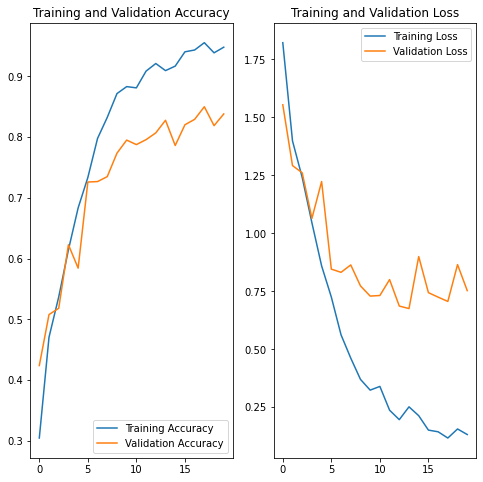

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### The training accuracy is increasing after each epoch. Validation accuracy also increased initialally but got saturated after some epochs.
#### Finally training accuracy is too high and validation accuracy is very low , and the model has achieved only around 55% accuracy on the validation set.
#### Our model is overfitting.

#### Data augmentation takes the approach of generating additional training data from your existing examples by augmenting them using random transformations that yield believable-looking images. This helps expose the model to more aspects of the data and generalize better.

In [21]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal_and_vertical",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

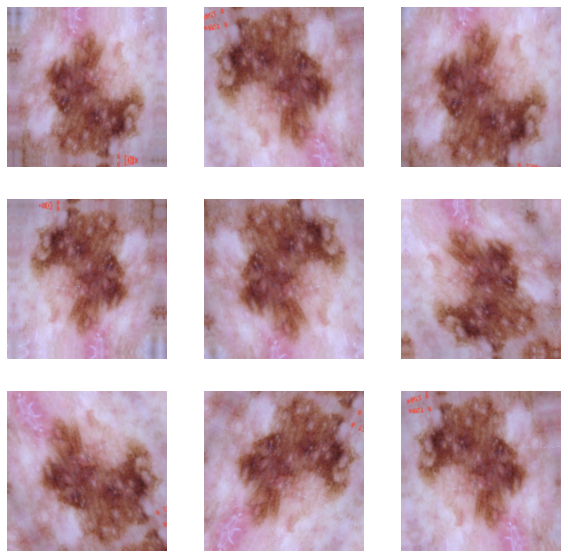

In [22]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

#### Another technique to reduce overfitting is to introduce dropout regularization to the network.

#### When we apply dropout to a layer, it randomly drops out (by setting the activation to zero) a number of output units from the layer during the training process. Dropout takes a fractional number as its input value, in the form such as 0.1, 0.2, 0.4, etc. This means dropping out 10%, 20% or 40% of the output units randomly from the applied layer.

In [23]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(64, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])

### Compiling the model

In [24]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               'categorical_crossentropy',
              metrics=['accuracy'])

In [25]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                  

### Training the model

In [26]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
169/169 [==============================] - 164s 930ms/step - loss: 1.8118 - accuracy: 0.3158 - val_loss: 1.6286 - val_accuracy: 0.3883
Epoch 2/20
169/169 [==============================] - 156s 924ms/step - loss: 1.4659 - accuracy: 0.4388 - val_loss: 1.3266 - val_accuracy: 0.4870
Epoch 3/20
169/169 [==============================] - 156s 925ms/step - loss: 1.3587 - accuracy: 0.4759 - val_loss: 1.2739 - val_accuracy: 0.4981
Epoch 4/20
169/169 [==============================] - 28005s 167s/step - loss: 1.2464 - accuracy: 0.5187 - val_loss: 1.1795 - val_accuracy: 0.5516
Epoch 5/20
169/169 [==============================] - 156s 922ms/step - loss: 1.1803 - accuracy: 0.5488 - val_loss: 1.1501 - val_accuracy: 0.5679
Epoch 6/20
169/169 [==============================] - 156s 920ms/step - loss: 1.1275 - accuracy: 0.5707 - val_loss: 1.0831 - val_accuracy: 0.5850
Epoch 7/20
169/169 [==============================] - 156s 922ms/step - loss: 1.0432 - accuracy: 0.6011 - val_loss: 1.1381 

### Visualizing the results

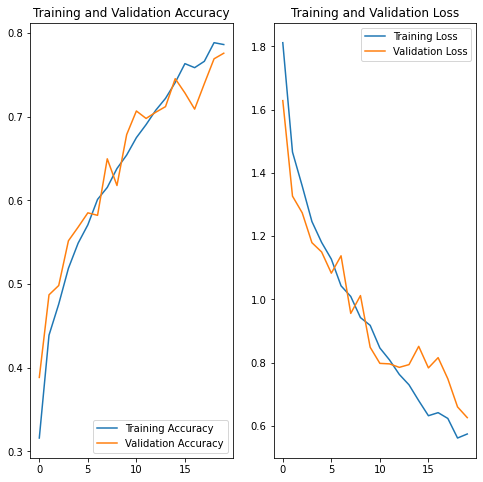

In [27]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Training accuracy has been decreased and very little change in valication accuracy. Yes there is small improvement in model validation accuracy

#### Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [28]:
from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
path_list

['C:\\Users\\Rebel\\Documents\\upgrad\\CNN_assignment\\CNN_Data\\Train\\actinic keratosis\\ISIC_0025780.jpg',
 'C:\\Users\\Rebel\\Documents\\upgrad\\CNN_assignment\\CNN_Data\\Train\\actinic keratosis\\ISIC_0025803.jpg',
 'C:\\Users\\Rebel\\Documents\\upgrad\\CNN_assignment\\CNN_Data\\Train\\actinic keratosis\\ISIC_0025825.jpg',
 'C:\\Users\\Rebel\\Documents\\upgrad\\CNN_assignment\\CNN_Data\\Train\\actinic keratosis\\ISIC_0025953.jpg',
 'C:\\Users\\Rebel\\Documents\\upgrad\\CNN_assignment\\CNN_Data\\Train\\actinic keratosis\\ISIC_0025957.jpg',
 'C:\\Users\\Rebel\\Documents\\upgrad\\CNN_assignment\\CNN_Data\\Train\\actinic keratosis\\ISIC_0025992.jpg',
 'C:\\Users\\Rebel\\Documents\\upgrad\\CNN_assignment\\CNN_Data\\Train\\actinic keratosis\\ISIC_0026040.jpg',
 'C:\\Users\\Rebel\\Documents\\upgrad\\CNN_assignment\\CNN_Data\\Train\\actinic keratosis\\ISIC_0026149.jpg',
 'C:\\Users\\Rebel\\Documents\\upgrad\\CNN_assignment\\CNN_Data\\Train\\actinic keratosis\\ISIC_0026171.jpg',
 'C:\\User

In [29]:
class_list = [os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
class_list

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [30]:
dataframe_dict = dict(zip(path_list, class_list))

In [31]:
df1 = pd.DataFrame(list(dataframe_dict.items()),columns = ['Path','Label'])
df1['Label'].value_counts()

pigmented benign keratosis    462
melanoma                      438
basal cell carcinoma          376
nevus                         357
squamous cell carcinoma       181
vascular lesion               139
actinic keratosis             114
dermatofibroma                 95
seborrheic keratosis           77
Name: Label, dtype: int64

#### - Which class has the least number of samples?
#### seborrheic keratosis category cancer has least number of samples
#### - Which classes dominate the data in terms proportionate number of samples?
#### pigmented benign keratosis and melanoma dominate in terms of proportionate of number of samples


#### The data is highly imbalance. We can see that 50% of classes have more that 10% of data and rest 50% classess have less than 10% of data.

#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [32]:
!pip install Augmentor


[notice] A new release of pip available: 22.2.1 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip


To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [33]:
path_to_training_dataset="C:/Users/Rebel/Documents/upgrad/CNN_assignment/CNN_Data/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to C:/Users/Rebel/Documents/upgrad/CNN_assignment/CNN_Data/Train/actinic keratosis\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x23DAE0DB490>: 100%|█| 500/500 [00:06<00:


Initialised with 376 image(s) found.
Output directory set to C:/Users/Rebel/Documents/upgrad/CNN_assignment/CNN_Data/Train/basal cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x23DADF97E20>: 100%|█| 500/500 [00:06<00:00, 72.62 Samples/


Initialised with 95 image(s) found.
Output directory set to C:/Users/Rebel/Documents/upgrad/CNN_assignment/CNN_Data/Train/dermatofibroma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x23DAE081810>: 100%|█| 500/500 [00:07<00:00, 64.60 Samples/


Initialised with 438 image(s) found.
Output directory set to C:/Users/Rebel/Documents/upgrad/CNN_assignment/CNN_Data/Train/melanoma\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x23DA110B8E0>: 100%|█| 500/500 [00:44<00:00, 11.20 Samples


Initialised with 357 image(s) found.
Output directory set to C:/Users/Rebel/Documents/upgrad/CNN_assignment/CNN_Data/Train/nevus\output.

Processing <PIL.Image.Image image mode=RGB size=767x576 at 0x23D9CDFCC70>: 100%|█| 500/500 [00:41<00:00, 12.03 Samples/


Initialised with 462 image(s) found.
Output directory set to C:/Users/Rebel/Documents/upgrad/CNN_assignment/CNN_Data/Train/pigmented benign keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x23DA10DE4D0>: 100%|█| 500/500 [00:06<00:00, 72.93 Samples/


Initialised with 77 image(s) found.
Output directory set to C:/Users/Rebel/Documents/upgrad/CNN_assignment/CNN_Data/Train/seborrheic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x23D9CE8DE10>: 100%|█| 500/500 [00:18<00:00, 27.52 Samples


Initialised with 181 image(s) found.
Output directory set to C:/Users/Rebel/Documents/upgrad/CNN_assignment/CNN_Data/Train/squamous cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x23D9CEC1F30>: 100%|█| 500/500 [00:07<00:00, 69.70 Samples/


Initialised with 139 image(s) found.
Output directory set to C:/Users/Rebel/Documents/upgrad/CNN_assignment/CNN_Data/Train/vascular lesion\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x23D9CE2B2B0>: 100%|█| 500/500 [00:06<00:00, 72.48 Samples/


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [34]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

9000


### Lets see the distribution of augmented data after adding new images to the original training data.

In [35]:
path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list_new

['C:\\Users\\Rebel\\Documents\\upgrad\\CNN_assignment\\CNN_Data\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_22ca61d5-4405-4a07-9807-ee8cd57eb7ab.jpg',
 'C:\\Users\\Rebel\\Documents\\upgrad\\CNN_assignment\\CNN_Data\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_418e0aa5-b94d-4040-970b-9a56dc3c016a.jpg',
 'C:\\Users\\Rebel\\Documents\\upgrad\\CNN_assignment\\CNN_Data\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_58d1420f-15d0-4829-a240-0442c2c7dd65.jpg',
 'C:\\Users\\Rebel\\Documents\\upgrad\\CNN_assignment\\CNN_Data\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_7a573cbf-2dcb-40b4-af98-f5383291904d.jpg',
 'C:\\Users\\Rebel\\Documents\\upgrad\\CNN_assignment\\CNN_Data\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_89f74676-cb41-41ac-9068-31abb131712f.jpg',
 'C:\\Users\\Rebel\\Documents\\upgrad\\CNN_assignment\\CNN_Data\\Train

In [36]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [37]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [38]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = df1.append(df2)

In [39]:
new_df['Path']

0       C:\Users\Rebel\Documents\upgrad\CNN_assignment...
1       C:\Users\Rebel\Documents\upgrad\CNN_assignment...
2       C:\Users\Rebel\Documents\upgrad\CNN_assignment...
3       C:\Users\Rebel\Documents\upgrad\CNN_assignment...
4       C:\Users\Rebel\Documents\upgrad\CNN_assignment...
                              ...                        
8995    C:\Users\Rebel\Documents\upgrad\CNN_assignment...
8996    C:\Users\Rebel\Documents\upgrad\CNN_assignment...
8997    C:\Users\Rebel\Documents\upgrad\CNN_assignment...
8998    C:\Users\Rebel\Documents\upgrad\CNN_assignment...
8999    C:\Users\Rebel\Documents\upgrad\CNN_assignment...
Name: Path, Length: 11239, dtype: object

In [40]:
new_df['Label'].value_counts()

pigmented benign keratosis    1462
melanoma                      1438
basal cell carcinoma          1376
nevus                         1357
squamous cell carcinoma       1181
vascular lesion               1139
actinic keratosis             1114
dermatofibroma                1095
seborrheic keratosis          1077
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### Train the model on the data created using Augmentor

In [41]:
batch_size = 32
img_height = 180
img_width = 180

#### Create a training dataset

In [42]:
data_dir_train=pathlib.Path(r"C:\Users\Rebel\Documents\upgrad\CNN_assignment\CNN_Data\Train")
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 11239 files belonging to 9 classes.
Using 8992 files for training.


####  Create a validation dataset

In [43]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 11239 files belonging to 9 classes.
Using 2247 files for validation.


####  Create your model (make sure to include normalization)

In [44]:
model = Sequential([
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(64, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])

####  Compile your model (Choose optimizer and loss function appropriately)

In [45]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               loss='categorical_crossentropy',
              metrics=['accuracy'])

####   Train your model

In [46]:
epochs = 30
## Your code goes here, use 50 epochs.
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
281/281 [==============================] - 256s 902ms/step - loss: 1.7939 - accuracy: 0.3073 - val_loss: 1.3679 - val_accuracy: 0.4584
Epoch 2/30
281/281 [==============================] - 258s 913ms/step - loss: 1.2733 - accuracy: 0.5191 - val_loss: 1.1570 - val_accuracy: 0.5848
Epoch 3/30
281/281 [==============================] - 259s 918ms/step - loss: 1.0131 - accuracy: 0.6254 - val_loss: 0.9991 - val_accuracy: 0.6471
Epoch 4/30
281/281 [==============================] - 256s 909ms/step - loss: 0.7687 - accuracy: 0.7243 - val_loss: 0.8893 - val_accuracy: 0.6894
Epoch 5/30
281/281 [==============================] - 259s 917ms/step - loss: 0.5979 - accuracy: 0.7841 - val_loss: 0.5752 - val_accuracy: 0.7819
Epoch 6/30
281/281 [==============================] - 260s 921ms/step - loss: 0.4819 - accuracy: 0.8277 - val_loss: 0.5112 - val_accuracy: 0.8153
Epoch 7/30
281/281 [==============================] - 260s 921ms/step - loss: 0.3431 - accuracy: 0.8731 - val_loss: 0.4769 -

#### Visualize the model results

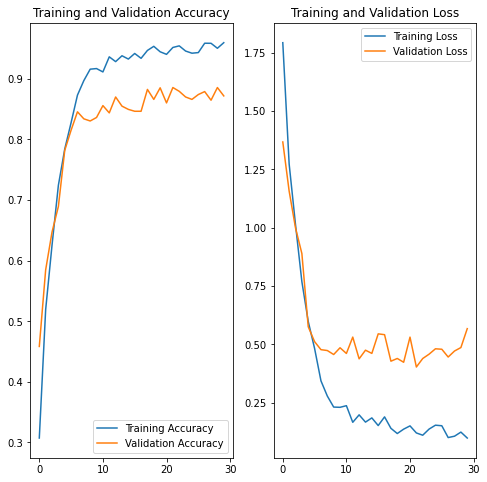

In [47]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



#### Yes I got rid of overfitting. Class rebalance helped in improving the accuracy of train set and  Now my model has achived 87.18% of validation accuracy.